# Evaluating a Machine Learning Algorithm
> ### A TOOL BOX - ‘WHAT TO TRY NEXT?’

## Overview
With abundance of easy-to-use Machine Learning Libraries, it is often appealing to apply them and achieve greater than 80% prediction accuracy in most cases. But, **‘WHAT TO TRY NEXT?’** is a question that buzz me and may be other aspiring Data Scientists too.
<br />
<br />
During my course **‘Machine Learning – Stanford Online’** at Coursera, **Prof. Andrew Ng** helped me sail through it. I hope this article, which briefs his explanation during one of his lectures, will help many of us to understand the importance of ‘debugging or diagnosing a learning algorithm’.
<br />
<br />

To start with, let’s call out all the possibilities or **‘WHAT TO TRY NEXT?’** when a hypothesis makes unacceptably large errors in its predictions or when there is a need to improve our hypothesis:


| No. | <p align="left">          **‘WHAT TO TRY NEXT?’**               </p>|
|---  |---------------------------------------------------------------------|
| 1.  | <p align="left"> Try Smaller Set of Features                    </p>|
| 2.  | <p align="left"> Add New Features                               </p>|
| 3.  | <p align="left"> Add Polynomial Features                        </p>|
| 4.  | <p align="left"> Decrease Regularization Parameter ($\lambda$)  </p>|
| 5.  | <p align="left"> Increase Regularization Parameter ($\lambda$)  </p>|
| 6.  | <p align="left"> Get More Training Examples                     </p>|



_<div style="text-align: right"> We will revisit this table to make smart choices and create our **TOOL BOX**. </div>_


The above-mentioned diagnosis will basically help us to find a **Bias Variance Trade Off**.  
Let’s visualize this concept briefly with a simple figure to illustrate the _overfitting_ (High Variance) and _underfitting_ (High Bias). 

## The Bias Variance Trade Off

_Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance._
<br />
Here is a link to [The Bias Variance Trade Off](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off) explained beautifully by Jake VanderPlas in Python Data Science Handbook.

Following code visualizes fitting of our hypothesis over different _degrees of polynomial_.  
Please note that _overfitting_ and _underfitting_ can also be visualized over different _regularization parameter_ and _training set size_.
> Source Code: [Scipy Lecture Notes](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html#bias-and-variance-of-polynomial-fit)

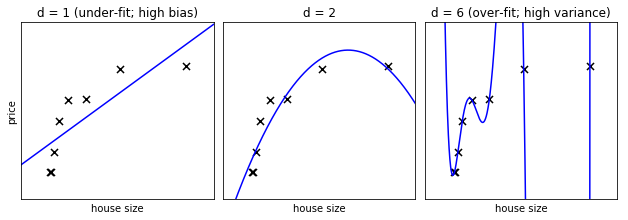

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 6 (over-fit; high variance)']
degrees = [1, 2, 6]

fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])
    
fig.savefig('graph-Images/bias-variance.png')

## Validation Curves

### 1. Varying Model Complexity

> Source Code: [Scipy Lecture Notes](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html#bias-and-variance-of-polynomial-fit)

Generate a larger dataset

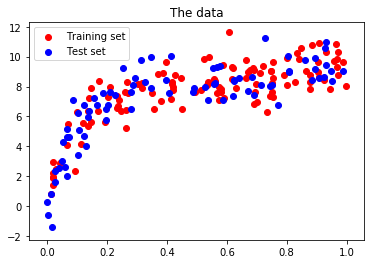

In [5]:
from sklearn.model_selection import train_test_split

n_samples = 200
test_size = 0.4
error = 1.0

# randomly sample the data
np.random.seed(1)
x = np.random.random(n_samples)
y = generating_func(x, error)

# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# show the training and validation sets
fig = plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color='red', label='Training set')
plt.scatter(x_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')

fig.savefig('graph-Images/data.png')

Plot a validation curve for varying model complexity

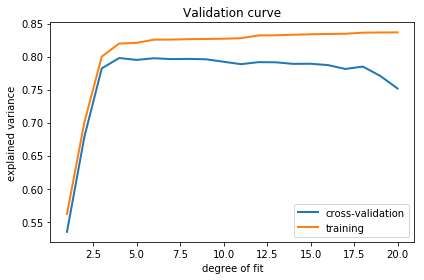

In [6]:
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 21)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, x[:, np.newaxis], y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees,
                 cv = 5)

# Plot the mean train error and validation error across folds
fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

fig.savefig('graph-Images/data-validationCurve.png')

<img src="graph-Images/validationCurveDegree.png"> </img>
Image Source: [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

|No.|<p align="left">**‘WHAT TO TRY NEXT?’**|<p align="left">**Results**|<p align="left">**Fixes**|
|-- |---------------------------------------|---------------------------|-------------------------|
|1. |<p align="left">Try Smaller Set of Features|<p align="left">Decreases Model Complexity|<p align="left">_High Variance_|
|2. |<p align="left">Add New Features|<p align="left"> Increases Model Complexity| <p align="left">_High Bias_|
|3. |<p align="left">Add Polynomial Features|<p align="left">Increases Model Complexity|<p align="left">_High Bias_|
|4. |<p align="left">Decrease Regularization Parameter ($\lambda$)||
|5. |<p align="left">Increase Regularization Parameter ($\lambda$)||
|6. |<p align="left">Get More Training Examples||


### 2. Varying Regularization Parameter

>To generate a dataset and plot a validation curve for varying regularization parameter is NOT within the scope of this discussion.  
Still interested? Please refer [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Regularization)

In [8]:
"""
We know that, the introduction of basis functions (PolynomialFeatures, GaussianFeatures etc.) into our linear regression makes the model much more flexible.  

_<div style="text-align: center"> But, does it come with the risk of something? </div>_
_<div style="text-align: center"> YES, and the answer is _**overfitting** </div>_

**Reason**: Our model is being too flexible to capture the outliers or extreme values in our training dataset.  
**Solution**: Regularization
"""

'\nWe know that, the introduction of basis functions (PolynomialFeatures, GaussianFeatures etc.) into our linear regression makes the model much more flexible.  \n\n_<div style="text-align: center"> But, does it come with the risk of something? </div>_\n_<div style="text-align: center"> YES, and the answer is _**overfitting** </div>_\n\n**Reason**: Our model is being too flexible to capture the outliers or extreme values in our training dataset.  \n**Solution**: Regularization\n'

**Regularization** is a form of regression that penalizes or constrains or regularizes the model parameters towards zero.
* This works well when we have a lot of features, each of which contributes a bit to our prediction.
* So, we keep all the features, but reduce the magnitude or values of parameters.

<img src="graph-Images/validationCurveLambda.png"> </img>
Image Source Code: [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

|No.|<p align="left">**‘WHAT TO TRY NEXT?’**|<p align="left">**Results**|<p align="left">**Fixes**|
|-- |---------------------------------------|---------------------------|-------------------------|
|1. |<p align="left">Try Smaller Set of Features|<p align="left">Decreases Model Complexity|<p align="left">_High Variance_|
|2. |<p align="left">Add New Features|<p align="left"> Increases Model Complexity| <p align="left">_High Bias_|
|3. |<p align="left">Add Polynomial Features|<p align="left">Increases Model Complexity|<p align="left">_High Bias_|
|4. |<p align="left">Decrease Regularization Parameter ($\lambda$)|<p align="left">Decreases Penalty|<p align="left">_High Bias_|
|5. |<p align="left">Increase Regularization Parameter ($\lambda$)|<p align="left">Increases Penalty|<p align="left">_High Variance_|
|6. |<p align="left">Get More Training Examples||


## Learning Curves

> Source Code: [Scipy Lecture Notes](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html#bias-and-variance-of-polynomial-fit)

Plot train and test error with an increasing number of samples for _FIXED MODEL COMPLEXITY_ (with d = 1 and d = 15)

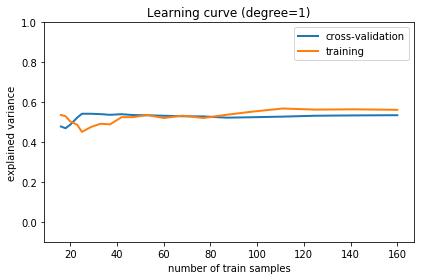

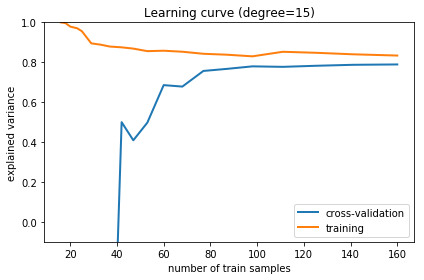

In [7]:
# A learning curve for d = 1, 15
for d in [1, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, validation_scores = learning_curve(
        model, x[:, np.newaxis], y,
        train_sizes=np.logspace(-1, 0, 20),
        cv = 5)

    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='training')
    plt.ylim(bottom=-.1, top=1)

    plt.legend(loc='best')
    plt.xlabel('number of train samples')
    plt.ylabel('explained variance')
    plt.title('Learning curve (degree=%i)' % d)
    plt.tight_layout()


plt.show()

**Varying Sample Size for Fixed Model Complexity (d = 1) - A High-Bias Estimator:**
* It _underfits_ the data as both the training and validation scores are low, or the learning curves have converged to a low score.
* We can expect that adding more training data will NOT help
* Revisit _‘WHAT TO TRY NEXT?’_ table to fix _High Bias_

**Varying Sample Size for Fixed Model Complexity (d = 15) - A High-Variance Estimator:**

* It _overfits_ the data as the training score is much higher than the validation score.
* As we add more samples to this training set:
    * the training score will continue to decrease, 
    * while the cross-validation score will continue to increase, until they meet in the middle.
* We can expect that adding more training data will help.

|No.|<p align="left">**‘WHAT TO TRY NEXT?’**|<p align="left">**Results**|<p align="left">**Fixes**|
|-- |---------------------------------------|---------------------------|-------------------------|
|1. |<p align="left">Try Smaller Set of Features|<p align="left">Decreases Model Complexity|<p align="left">_High Variance_|
|2. |<p align="left">Add New Features|<p align="left"> Increases Model Complexity| <p align="left">_High Bias_|
|3. |<p align="left">Add Polynomial Features|<p align="left">Increases Model Complexity|<p align="left">_High Bias_|
|4. |<p align="left">Decrease Regularization Parameter ($\lambda$)|<p align="left">Decreases Penalty|<p align="left">_High Bias_|
|5. |<p align="left">Increase Regularization Parameter ($\lambda$)|<p align="left">Increases Penalty|<p align="left">_High Variance_|
|6. |<p align="left">Get More Training Examples|<p align="left">Increases Sample Size|<p align="left">_High Variance_|


_<div style="text-align: center"> So as promised, here we have our **TOOL BOX - ‘WHAT TO TRY NEXT?’**  
    which, along with Validation and Learning Curves, will help us to make smart decisions. </div>_

### References
* A lecture from **‘Machine Learning – Stanford Online’** at Coursera, by **Prof. Andrew Ng**
* [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)
* [Scipy Lecture Notes](https://scipy-lectures.org/packages/scikit-learn/index.html)

Thank you for reading! Let me know in a comment if you felt like this did or didn’t help.  
If this article was helpful, share it.  

LinkedIn: https://linkedin.com/in/EklavyaSaxena/  
GitHub: https://github.com/EklavyaSaxena  